# Truncation Nation - Flight Data

In [39]:
#importing of various relevant packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline 

# Reading Data
traffic = pd.read_csv('data/daily_traffic_variation.csv', index_col="Day 2020", parse_dates = True)
# traffic.head()

# Irish Flight Data
start_found = False
end_found = False
for row in range(len(traffic)):
    if (traffic.iloc[row]['Entity'] == 'Ireland' and not start_found):
        start = row
        start_found = True
    if (traffic.iloc[row]['Entity'] == 'Ireland' and traffic.iloc[row + 1]['Entity'] != 'Ireland' and not end_found):
        end = row
        end_found = True

irish_flights = traffic.iloc[start:end + 1]
irish_flights

,Entity,Week,Flights 2019,Flights 2020,Daily Variation (Traffic),7-day moving average Flights 2020,Weekly Moving Average (Traffic),Number,Day 2019
Day 2020,,,,,,,,,
2020-03-01,Ireland,9,668,747,"0,118",693,"-0,007366482505",35,2019-03-03
2020-03-02,Ireland,10,765,762,"-0,004",694,"-0,002464065708",36,2019-03-04
2020-03-03,Ireland,10,621,645,"0,039","696,8571429","0,008267879289",37,2019-03-05
2020-03-04,Ireland,10,648,648,0,"698,1428571","0,01180124224",38,2019-03-06
2020-03-05,Ireland,10,732,708,"-0,033","697,5714286","0,01118243943",39,2019-03-07
...,...,...,...,...,...,...,...,...,...
2020-12-18,Ireland,51,828,315,"-0,62","182,8571429","-0,7424547284",327,2019-12-20
2020-12-19,Ireland,51,700,250,"-0,643","199,8571429","-0,7253631724",328,2019-12-21
2020-12-20,Ireland,51,765,266,"-0,652","215,2857143","-0,7057215388",329,2019-12-22


In [40]:
del irish_flights["Entity"]
del irish_flights["Week"]
del irish_flights["Flights 2019"]
del irish_flights["Daily Variation (Traffic)"]
del irish_flights["Weekly Moving Average (Traffic)"]
del irish_flights["Number"]
del irish_flights["Day 2019"]
del irish_flights["7-day moving average Flights 2020"]


irish_flights

,Flights 2020
Day 2020,
2020-03-01,747
2020-03-02,762
2020-03-03,645
2020-03-04,648
2020-03-05,708
...,...
2020-12-18,315
2020-12-19,250
2020-12-20,266


In [41]:
irish_flights.to_csv('./data/cleaned/irish_flights.csv', sep=',')

In [42]:
# Dates ofIrish lockdowns
first_irish_lockdown=["2020-03-15","2020-05-18"]
second_irish_lockdown=["2020-10-21","2020-12-1"]

In [43]:
#Used to plot a single variable on a detailled linegraph
def irishLineGraph(dataFrame, heading):
    ax=dataFrame.plot(figsize=(15,8),fontsize=20,color="blue")
    ax.set_title(heading,fontsize=30, color="darkgreen")
    ax.text("2020-04-20",dataFrame.mean(),"First Lockdown",rotation=90,fontsize=15)
    ax.text("2020-10-26",dataFrame.mean(),"Second Lockdown",rotation=90,fontsize=15)
    ax.set_xlabel('', fontsize=24,color="blue")
    ax.set_ylabel('Number of Irish Flights', fontsize=24,color="blue")
    plt.axvspan(first_irish_lockdown[0],first_irish_lockdown[1] , color="palegreen", alpha=0.5)
    plt.axvspan(second_irish_lockdown[0],second_irish_lockdown[1] , color="palegreen", alpha=0.5)
    plt.grid()
    plt.show()

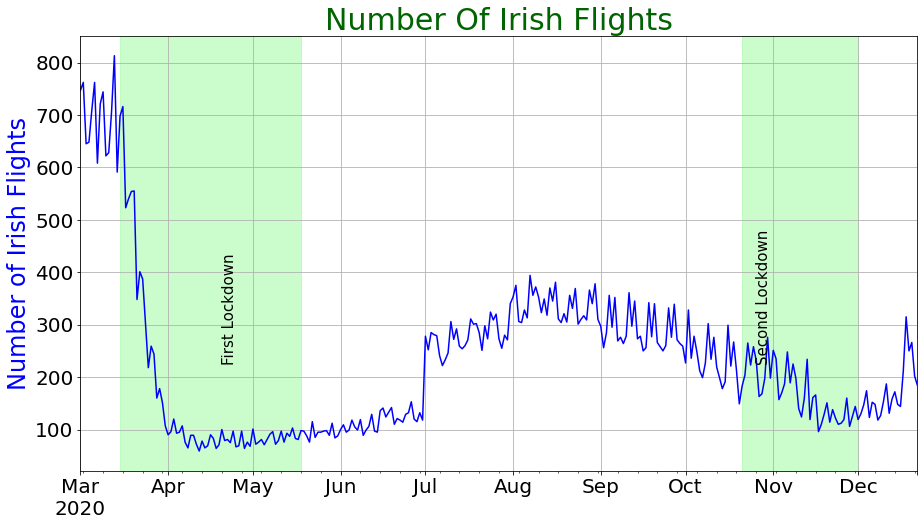

In [44]:
irish_num_flights=irish_flights["Flights 2020"]
irishLineGraph(irish_num_flights, "Number Of Irish Flights")

In [45]:
def aggByMonth(df):
    return df.groupby(df.index.month).sum()



def byMonth(df):
    return df.groupby(df.index.month).mean()

In [46]:
#Function that shows a given dataframe as a barchart
def irishBarchart(df, heading):
    p = df.plot.bar(figsize=(15, 10), fontsize=14,color="g")
    p.set_title(heading, fontsize=30, color="g")
    p.set_xlabel('Month', fontsize=24,color="g")
    p.set_ylabel('Avg Num of Daily Flights', fontsize=24,color="g")
    p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

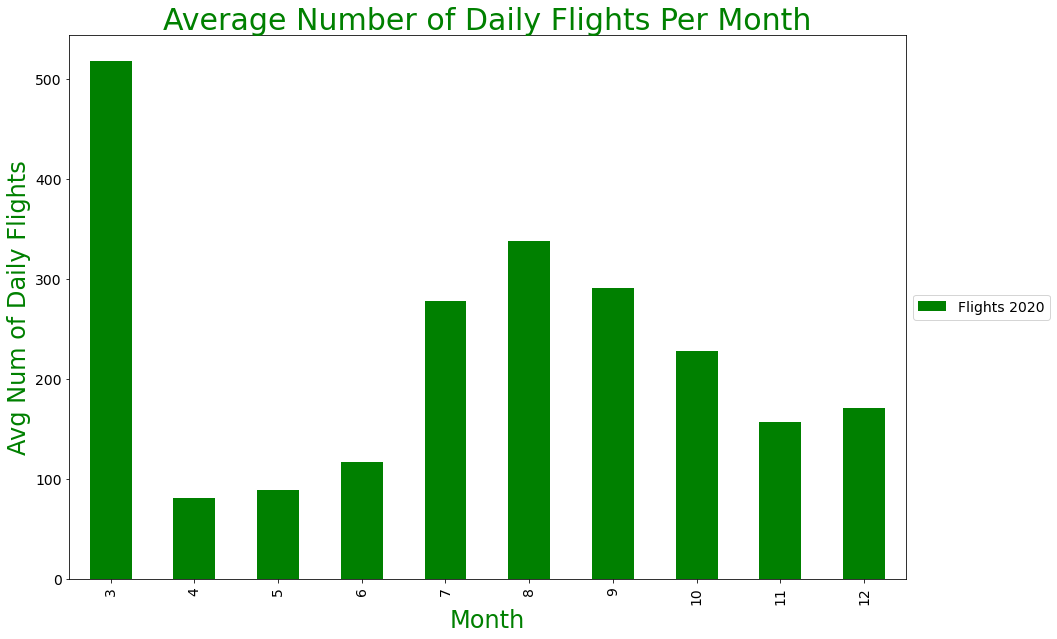

In [47]:
flights_mean_monthly=byMonth(irish_num_flights)
flights_mean_monthly
irishBarchart(flights_mean_monthly, "Average Number of Daily Flights Per Month")

In [48]:
covid_stats = pd.read_csv('data/cleaned/covid_stats.csv',index_col="Unnamed: 0")
covid_stats.dropna(inplace=True)
covid_stats.head()

,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,HospitalisedCovidCases,TravelAbroad
2020-03-18,74,366,0,2,84.0,52.0
2020-03-19,191,557,1,3,108.0,43.0
2020-03-20,126,683,0,3,140.0,39.0
2020-03-21,102,785,0,3,173.0,35.0
2020-03-22,121,906,1,4,211.0,33.0


In [66]:
# comparitive function used to plot multiple variables at a time.
def irishComparitiveLineGraph(df, heading):
    ax = df.plot(figsize=(15, 10), fontsize=14, color=["magenta", "blue","darkorange","dimgray","deepskyblue","darkgoldenrod","aqua"])
    ax.set_title(heading,fontsize=30, color="darkgreen")
    plt.grid()
    plt.show()

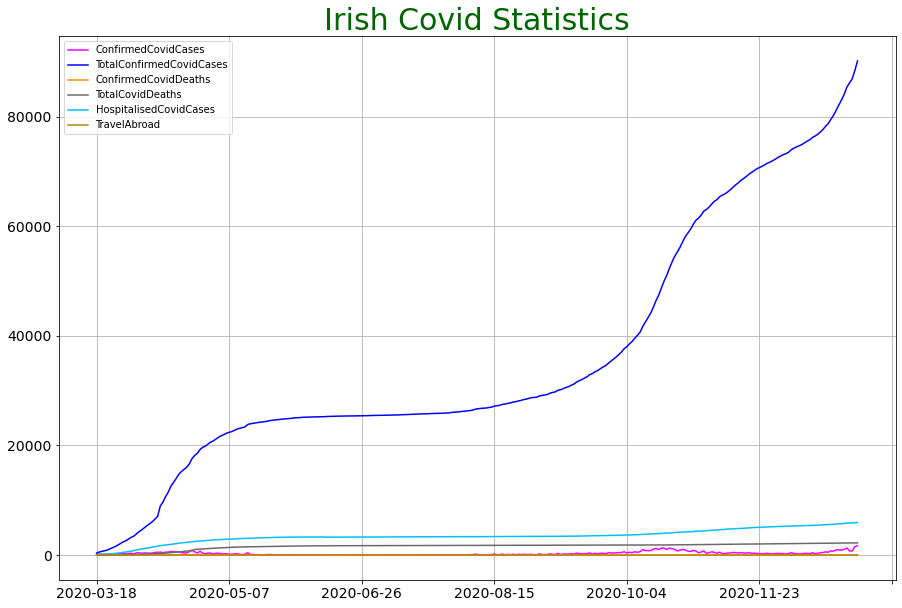

In [68]:
irishComparitiveLineGraph(covid_stats,"Irish Covid Statistics")